In [1]:
import numpy as np
import pandas as pd
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

import tensorflow as tf

In [2]:
files = glob.glob('*.csv')


In [3]:
dfs = []
for file in files:
    df = pd.read_csv(file)
    dfs.append(df)

In [4]:
dfs

[                Date/Time  \
 0     Year 1 Jan 01 01:00   
 1     Year 1 Jan 01 02:00   
 2     Year 1 Jan 01 03:00   
 3     Year 1 Jan 01 04:00   
 4     Year 1 Jan 01 05:00   
 ...                   ...   
 8754  Year 1 Dec 31 19:00   
 8755  Year 1 Dec 31 20:00   
 8756  Year 1 Dec 31 21:00   
 8757  Year 1 Dec 31 22:00   
 8758  Year 1 Dec 31 23:00   
 
       [1] Site Diffuse Solar Radiation Rate per Area  (W/m2)  \
 0                                                   0.0        
 1                                                   0.0        
 2                                                   0.0        
 3                                                   0.0        
 4                                                   0.0        
 ...                                                 ...        
 8754                                                0.0        
 8755                                                0.0        
 8756                                                

In [5]:
data=pd.concat(dfs)

In [6]:
data


,Date/Time,[1] Site Diffuse Solar Radiation Rate per Area (W/m2),[1] Site Direct Solar Radiation Rate per Area (W/m2),[1] Site Outdoor Air Dewpoint Temperature (C),[1] Site Outdoor Air Drybulb Temperature (C),[1] Site Solar Altitude Angle (deg),[1] Site Solar Azimuth Angle (deg),[1] Site Wind Direction (deg),[1] Site Wind Speed (m/s),[1] Surface Outside Face Temperature (C),Orientation,Lats,Longs
0,Year 1 Jan 01 01:00,0.0,0.0,5.600,14.075,-86.550209,91.104045,220.00,2.925,17.425801,0,23.0225,72.5714
1,Year 1 Jan 01 02:00,0.0,0.0,6.500,13.550,-75.710457,93.157099,180.00,1.725,17.436224,0,23.0225,72.5714
2,Year 1 Jan 01 03:00,0.0,0.0,7.400,13.125,-61.958056,96.159063,45.00,0.350,17.430286,0,23.0225,72.5714
3,Year 1 Jan 01 04:00,0.0,0.0,7.825,12.400,-48.286846,99.382686,0.00,0.375,17.410444,0,23.0225,72.5714
4,Year 1 Jan 01 05:00,0.0,0.0,7.975,11.600,-34.749348,102.923038,0.00,0.875,17.374948,0,23.0225,72.5714
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,Year 1 Dec 31 19:00,0.0,0.0,6.325,21.350,-12.176278,249.653350,3.75,0.025,23.663594,90,22.7196,75.8577
8755,Year 1 Dec 31 20:00,0.0,0.0,6.550,18.375,-25.321975,254.015331,0.00,0.000,22.149918,90,22.7196,75.8577
8756,Year 1 Dec 31 21:00,0.0,0.0,7.050,16.025,-38.737982,257.722237,30.75,0.000,20.445485,90,22.7196,75.8577
8757,Year 1 Dec 31 22:00,0.0,0.0,7.575,14.450,-52.333160,260.924964,87.50,0.525,19.256711,90,22.7196,75.8577


In [7]:
data.dtypes

Date/Time                                                  object
[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)    float64
[1] Site Direct Solar Radiation Rate per Area  (W/m2)     float64
[1] Site Outdoor Air Dewpoint Temperature  (C)            float64
[1] Site Outdoor Air Drybulb Temperature  (C)             float64
[1] Site Solar Altitude Angle  (deg)                      float64
[1] Site Solar Azimuth Angle  (deg)                       float64
[1] Site Wind Direction  (deg)                            float64
[1] Site Wind Speed  (m/s)                                float64
[1] Surface Outside Face Temperature  (C)                 float64
Orientation                                                 int64
Lats                                                      float64
Longs                                                     float64
dtype: object

In [8]:
import pandas as pd

# Assuming data_a0 is your DataFrame
data['Date/Time'] = pd.to_datetime(data['Date/Time'].str.replace('Year 1 ', '2002'), format="%Y%b %d %H:%M")


In [9]:
data

,Date/Time,[1] Site Diffuse Solar Radiation Rate per Area (W/m2),[1] Site Direct Solar Radiation Rate per Area (W/m2),[1] Site Outdoor Air Dewpoint Temperature (C),[1] Site Outdoor Air Drybulb Temperature (C),[1] Site Solar Altitude Angle (deg),[1] Site Solar Azimuth Angle (deg),[1] Site Wind Direction (deg),[1] Site Wind Speed (m/s),[1] Surface Outside Face Temperature (C),Orientation,Lats,Longs
0,2002-01-01 01:00:00,0.0,0.0,5.600,14.075,-86.550209,91.104045,220.00,2.925,17.425801,0,23.0225,72.5714
1,2002-01-01 02:00:00,0.0,0.0,6.500,13.550,-75.710457,93.157099,180.00,1.725,17.436224,0,23.0225,72.5714
2,2002-01-01 03:00:00,0.0,0.0,7.400,13.125,-61.958056,96.159063,45.00,0.350,17.430286,0,23.0225,72.5714
3,2002-01-01 04:00:00,0.0,0.0,7.825,12.400,-48.286846,99.382686,0.00,0.375,17.410444,0,23.0225,72.5714
4,2002-01-01 05:00:00,0.0,0.0,7.975,11.600,-34.749348,102.923038,0.00,0.875,17.374948,0,23.0225,72.5714
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,2002-12-31 19:00:00,0.0,0.0,6.325,21.350,-12.176278,249.653350,3.75,0.025,23.663594,90,22.7196,75.8577
8755,2002-12-31 20:00:00,0.0,0.0,6.550,18.375,-25.321975,254.015331,0.00,0.000,22.149918,90,22.7196,75.8577
8756,2002-12-31 21:00:00,0.0,0.0,7.050,16.025,-38.737982,257.722237,30.75,0.000,20.445485,90,22.7196,75.8577
8757,2002-12-31 22:00:00,0.0,0.0,7.575,14.450,-52.333160,260.924964,87.50,0.525,19.256711,90,22.7196,75.8577


In [10]:
data.iloc[50]

Date/Time                                                 2002-01-03 03:00:00
[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)                    0.0
[1] Site Direct Solar Radiation Rate per Area  (W/m2)                     0.0
[1] Site Outdoor Air Dewpoint Temperature  (C)                           6.15
[1] Site Outdoor Air Drybulb Temperature  (C)                            11.8
[1] Site Solar Altitude Angle  (deg)                               -62.150707
[1] Site Solar Azimuth Angle  (deg)                                 95.739049
[1] Site Wind Direction  (deg)                                            0.0
[1] Site Wind Speed  (m/s)                                              0.125
[1] Surface Outside Face Temperature  (C)                           17.089917
Orientation                                                                 0
Lats                                                                  23.0225
Longs                                                           

<Axes: >

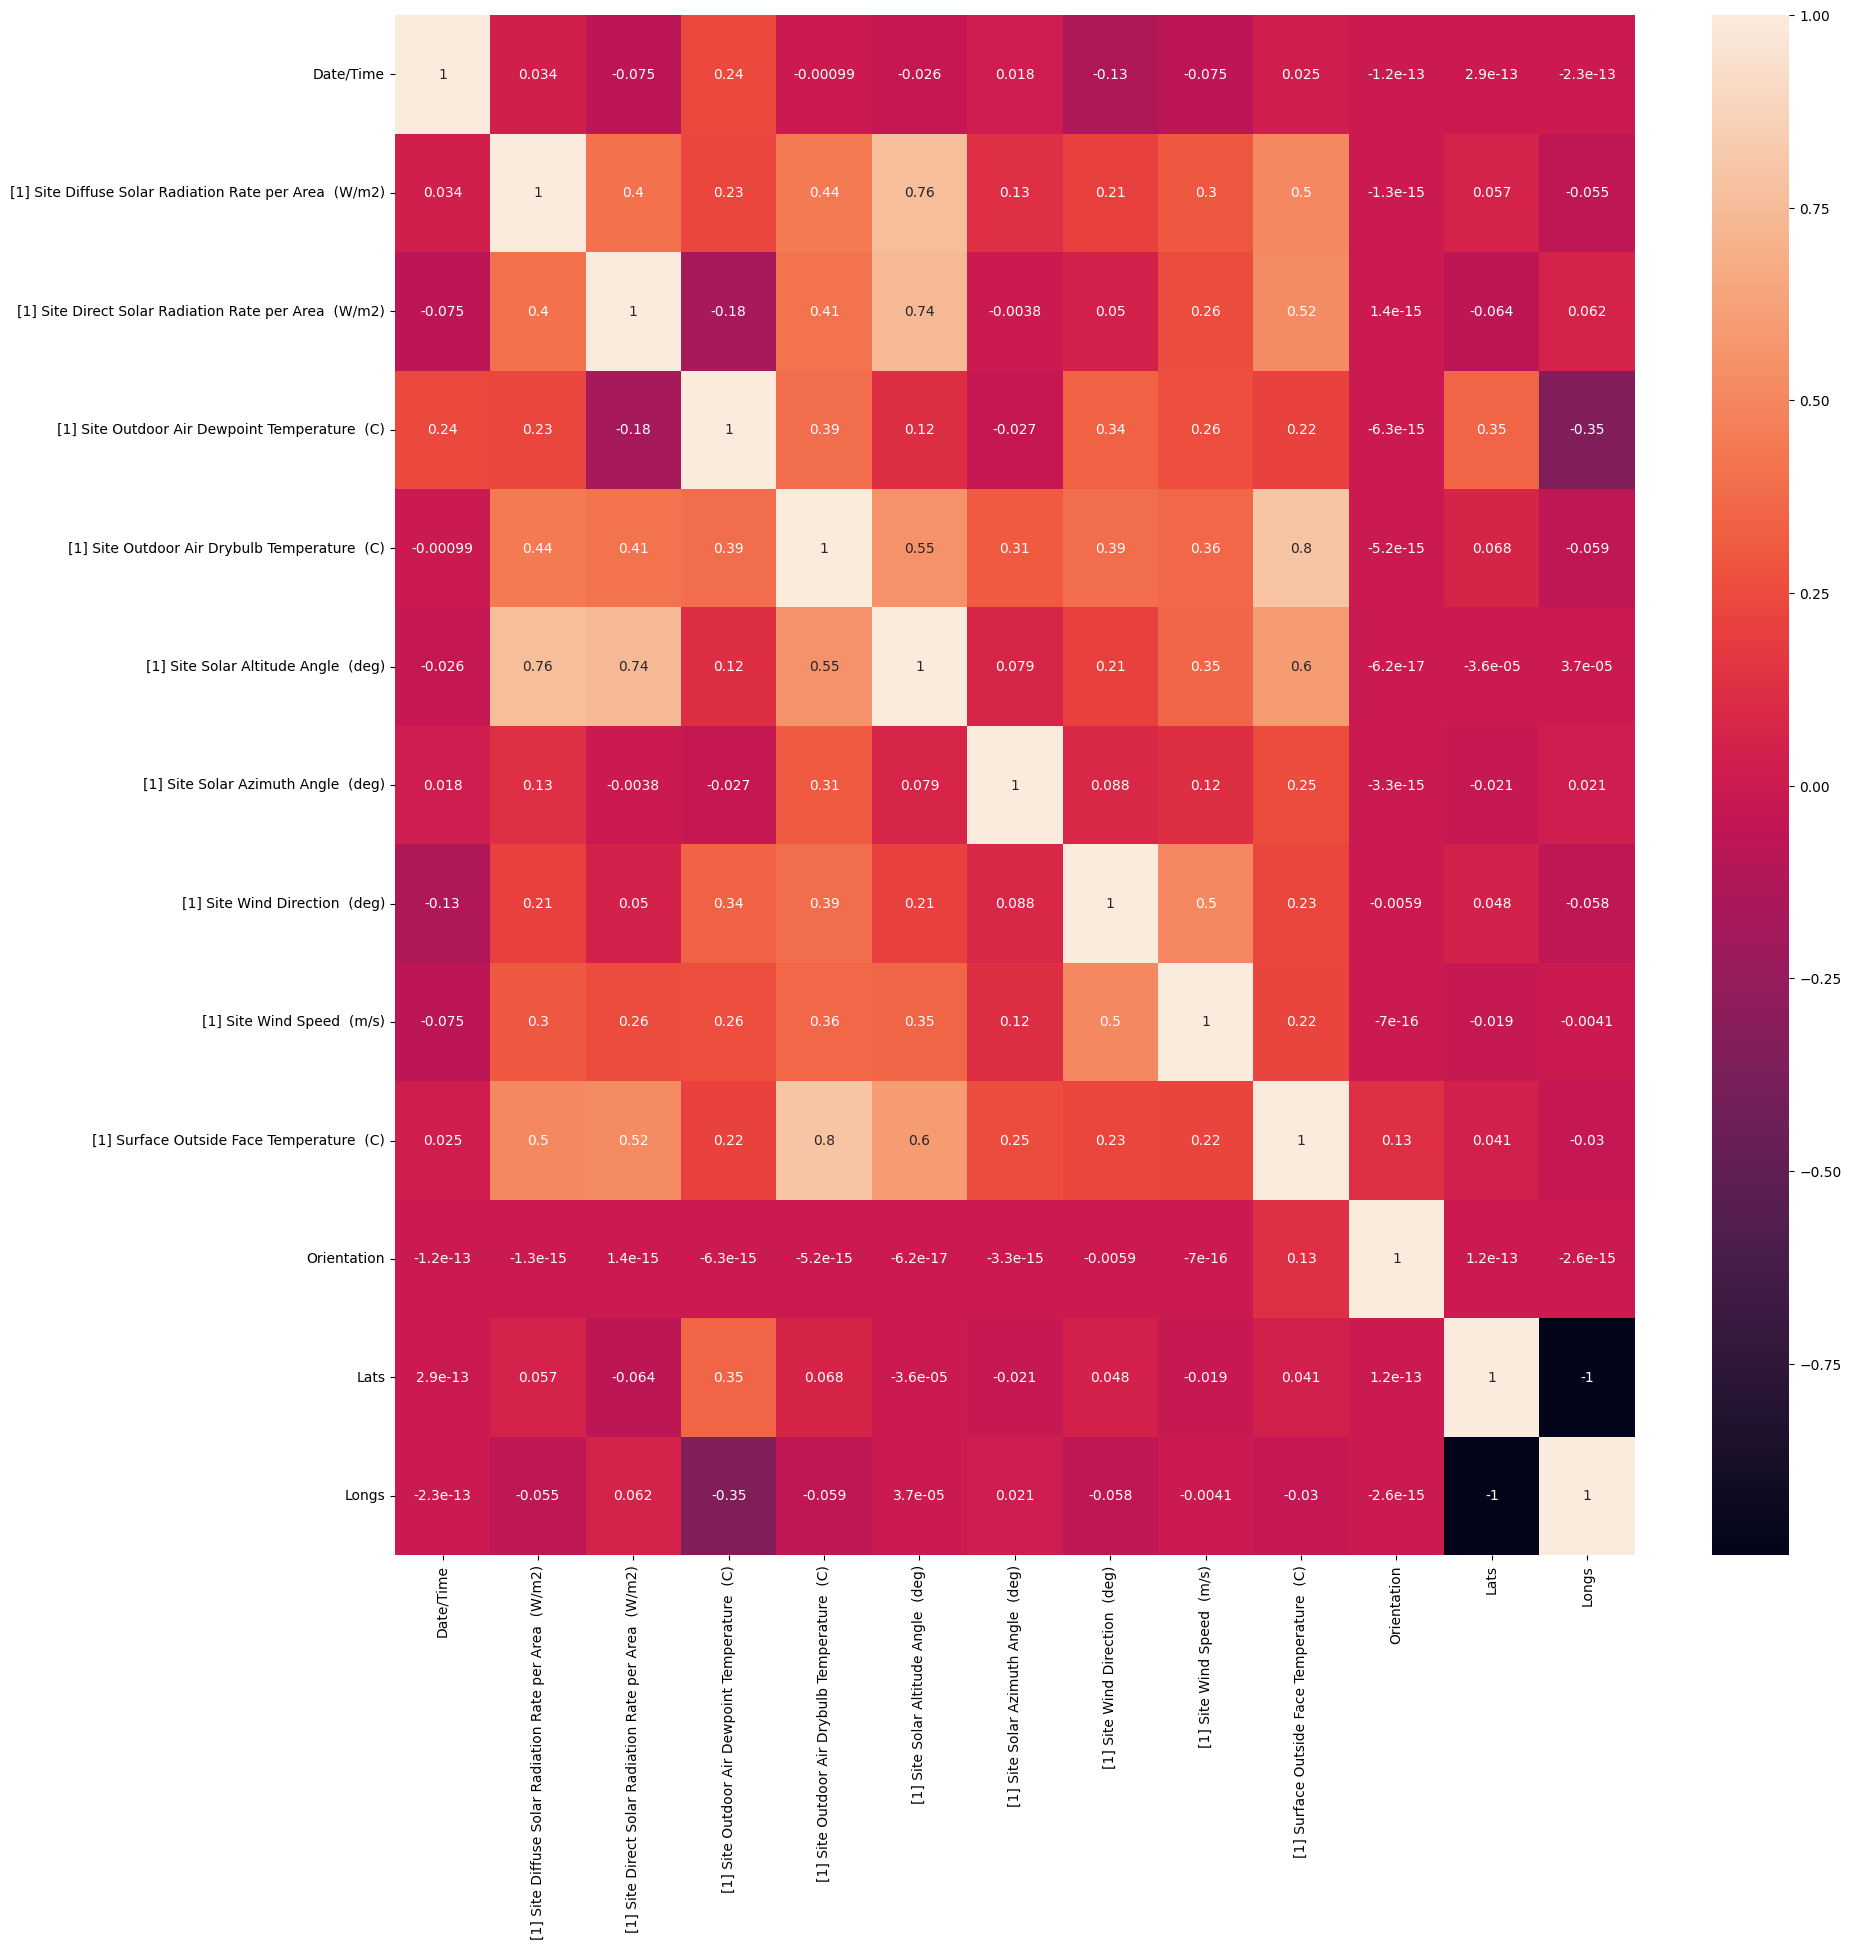

In [11]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(),annot = True)

In [12]:
data.dtypes
# Assuming theta, phi, and h are given angles in radians


Date/Time                                                 datetime64[ns]
[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)           float64
[1] Site Direct Solar Radiation Rate per Area  (W/m2)            float64
[1] Site Outdoor Air Dewpoint Temperature  (C)                   float64
[1] Site Outdoor Air Drybulb Temperature  (C)                    float64
[1] Site Solar Altitude Angle  (deg)                             float64
[1] Site Solar Azimuth Angle  (deg)                              float64
[1] Site Wind Direction  (deg)                                   float64
[1] Site Wind Speed  (m/s)                                       float64
[1] Surface Outside Face Temperature  (C)                        float64
Orientation                                                        int64
Lats                                                             float64
Longs                                                            float64
dtype: object

In [13]:
%pip install ephem

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
data.columns

Index(['Date/Time', '[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Direct Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Outdoor Air Dewpoint Temperature  (C)',
       '[1] Site Outdoor Air Drybulb Temperature  (C)',
       '[1] Site Solar Altitude Angle  (deg)',
       '[1] Site Solar Azimuth Angle  (deg)', '[1] Site Wind Direction  (deg)',
       '[1] Site Wind Speed  (m/s)',
       '[1] Surface Outside Face Temperature  (C)', 'Orientation', 'Lats',
       'Longs'],
      dtype='object')

In [15]:
import math
import ephem
import pandas as pd

def calculate_solar_parameters(data_row):
    # Set observer's latitude and longitude
    o.lat, o.long = str(data_row['Lats']), str(data_row['Longs'])

    # Get the Sun object
    sun = ephem.Sun()

    # Calculate sunrise, solar noon, and sunset
    sunrise = o.previous_rising(sun, start=ephem.now())
    solar_noon = o.next_transit(sun, start=sunrise)
    sunset = o.next_setting(sun, start=solar_noon)

    # Convert ephem.Date to pandas Timestamp
    solar_noon = pd.to_datetime(solar_noon.datetime())

    # Determine if the given time is before or after solar noon
    given_time = data_row['Date/Time']
    if given_time < solar_noon:
        hourangle = 2.5 * (abs((given_time - solar_noon).seconds) // 60)
    else:
        hourangle = -2.5 * (abs((given_time - solar_noon).seconds) // 60)

    # Calculate declination
    N = data_row['N']
    declination = 23.45 * math.sin(math.radians(360 * (284 + N) / 365))

    # Get azimuth from the data_row
    azimuth = data_row['[1] Site Solar Azimuth Angle  (deg)']

    return declination, hourangle, azimuth

def calculate_tt(data_row):
    # Get solar parameters
    declination, hourangle, azimuth = calculate_solar_parameters(data_row)

    # Convert angles to radians for trigonometric functions
    latitude_rad = math.radians(data_row['Lats'])
    declination_rad = math.radians(declination)
    hourangle_rad = math.radians(hourangle)
    azimuth_rad = math.radians(azimuth)

    # Calculate the cosine of tt using the given formula
    cos_tt = (
        -math.cos(latitude_rad) * math.sin(declination_rad) * math.cos(azimuth_rad)
        + math.sin(latitude_rad) * math.cos(declination_rad) * math.cos(hourangle_rad) * math.cos(azimuth_rad)
        + math.cos(declination_rad) * math.sin(hourangle_rad) * math.sin(azimuth_rad)
    )

    # Calculate tt using the arccosine function
    tt = cos_tt

    return tt

# Assuming your DataFrame is named 'data'
data['N'] = data['Date/Time'].dt.dayofyear

# Create an observer
o = ephem.Observer()

# Apply the functions to each row of the DataFrame
data['cos_incident_angle'] = data.apply(calculate_tt, axis=1)

# Display the result
print(data[['Date/Time', 'Lats', 'Longs', 'cos_incident_angle']])


               Date/Time     Lats    Longs  cos_incident_angle
0    2002-01-01 01:00:00  23.0225  72.5714            0.793500
1    2002-01-01 02:00:00  23.0225  72.5714           -0.938843
2    2002-01-01 03:00:00  23.0225  72.5714            0.734600
3    2002-01-01 04:00:00  23.0225  72.5714           -0.461887
4    2002-01-01 05:00:00  23.0225  72.5714           -0.160967
...                  ...      ...      ...                 ...
8754 2002-12-31 19:00:00  22.7196  75.8577            0.162933
8755 2002-12-31 20:00:00  22.7196  75.8577           -0.792884
8756 2002-12-31 21:00:00  22.7196  75.8577            0.817814
8757 2002-12-31 22:00:00  22.7196  75.8577           -0.888687
8758 2002-12-31 23:00:00  22.7196  75.8577            0.484283

[105108 rows x 4 columns]


In [16]:
data

,Date/Time,[1] Site Diffuse Solar Radiation Rate per Area (W/m2),[1] Site Direct Solar Radiation Rate per Area (W/m2),[1] Site Outdoor Air Dewpoint Temperature (C),[1] Site Outdoor Air Drybulb Temperature (C),[1] Site Solar Altitude Angle (deg),[1] Site Solar Azimuth Angle (deg),[1] Site Wind Direction (deg),[1] Site Wind Speed (m/s),[1] Surface Outside Face Temperature (C),Orientation,Lats,Longs,N,cos_incident_angle
0,2002-01-01 01:00:00,0.0,0.0,5.600,14.075,-86.550209,91.104045,220.00,2.925,17.425801,0,23.0225,72.5714,1,0.793500
1,2002-01-01 02:00:00,0.0,0.0,6.500,13.550,-75.710457,93.157099,180.00,1.725,17.436224,0,23.0225,72.5714,1,-0.938843
2,2002-01-01 03:00:00,0.0,0.0,7.400,13.125,-61.958056,96.159063,45.00,0.350,17.430286,0,23.0225,72.5714,1,0.734600
3,2002-01-01 04:00:00,0.0,0.0,7.825,12.400,-48.286846,99.382686,0.00,0.375,17.410444,0,23.0225,72.5714,1,-0.461887
4,2002-01-01 05:00:00,0.0,0.0,7.975,11.600,-34.749348,102.923038,0.00,0.875,17.374948,0,23.0225,72.5714,1,-0.160967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,2002-12-31 19:00:00,0.0,0.0,6.325,21.350,-12.176278,249.653350,3.75,0.025,23.663594,90,22.7196,75.8577,365,0.162933
8755,2002-12-31 20:00:00,0.0,0.0,6.550,18.375,-25.321975,254.015331,0.00,0.000,22.149918,90,22.7196,75.8577,365,-0.792884
8756,2002-12-31 21:00:00,0.0,0.0,7.050,16.025,-38.737982,257.722237,30.75,0.000,20.445485,90,22.7196,75.8577,365,0.817814
8757,2002-12-31 22:00:00,0.0,0.0,7.575,14.450,-52.333160,260.924964,87.50,0.525,19.256711,90,22.7196,75.8577,365,-0.888687


In [17]:
data['[1] Site Direct Solar Radiation Rate per Area  (W/m2)'] = pd.to_numeric(data['[1] Site Direct Solar Radiation Rate per Area  (W/m2)'], errors='coerce')
data['[1] Site Solar Azimuth Angle  (deg)'] = pd.to_numeric(data['[1] Site Solar Azimuth Angle  (deg)'], errors='coerce')

data['incident_solar'] = data['[1] Site Direct Solar Radiation Rate per Area  (W/m2)'] * data['cos_incident_angle'] +\
                     data['[1] Site Direct Solar Radiation Rate per Area  (W/m2)'] * (1 + np.cos(np.radians(data['[1] Site Solar Azimuth Angle  (deg)'])) / 2)


In [18]:
data['cos_altitude']=np.cos(np.radians(data['[1] Site Solar Altitude Angle  (deg)']))

In [19]:
data

,Date/Time,[1] Site Diffuse Solar Radiation Rate per Area (W/m2),[1] Site Direct Solar Radiation Rate per Area (W/m2),[1] Site Outdoor Air Dewpoint Temperature (C),[1] Site Outdoor Air Drybulb Temperature (C),[1] Site Solar Altitude Angle (deg),[1] Site Solar Azimuth Angle (deg),[1] Site Wind Direction (deg),[1] Site Wind Speed (m/s),[1] Surface Outside Face Temperature (C),Orientation,Lats,Longs,N,cos_incident_angle,incident_solar,cos_altitude
0,2002-01-01 01:00:00,0.0,0.0,5.600,14.075,-86.550209,91.104045,220.00,2.925,17.425801,0,23.0225,72.5714,1,0.793500,0.0,0.060174
1,2002-01-01 02:00:00,0.0,0.0,6.500,13.550,-75.710457,93.157099,180.00,1.725,17.436224,0,23.0225,72.5714,1,-0.938843,0.0,0.246822
2,2002-01-01 03:00:00,0.0,0.0,7.400,13.125,-61.958056,96.159063,45.00,0.350,17.430286,0,23.0225,72.5714,1,0.734600,0.0,0.470118
3,2002-01-01 04:00:00,0.0,0.0,7.825,12.400,-48.286846,99.382686,0.00,0.375,17.410444,0,23.0225,72.5714,1,-0.461887,0.0,0.665402
4,2002-01-01 05:00:00,0.0,0.0,7.975,11.600,-34.749348,102.923038,0.00,0.875,17.374948,0,23.0225,72.5714,1,-0.160967,0.0,0.821653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,2002-12-31 19:00:00,0.0,0.0,6.325,21.350,-12.176278,249.653350,3.75,0.025,23.663594,90,22.7196,75.8577,365,0.162933,0.0,0.977503
8755,2002-12-31 20:00:00,0.0,0.0,6.550,18.375,-25.321975,254.015331,0.00,0.000,22.149918,90,22.7196,75.8577,365,-0.792884,0.0,0.903919
8756,2002-12-31 21:00:00,0.0,0.0,7.050,16.025,-38.737982,257.722237,30.75,0.000,20.445485,90,22.7196,75.8577,365,0.817814,0.0,0.780016
8757,2002-12-31 22:00:00,0.0,0.0,7.575,14.450,-52.333160,260.924964,87.50,0.525,19.256711,90,22.7196,75.8577,365,-0.888687,0.0,0.611069


<Axes: >

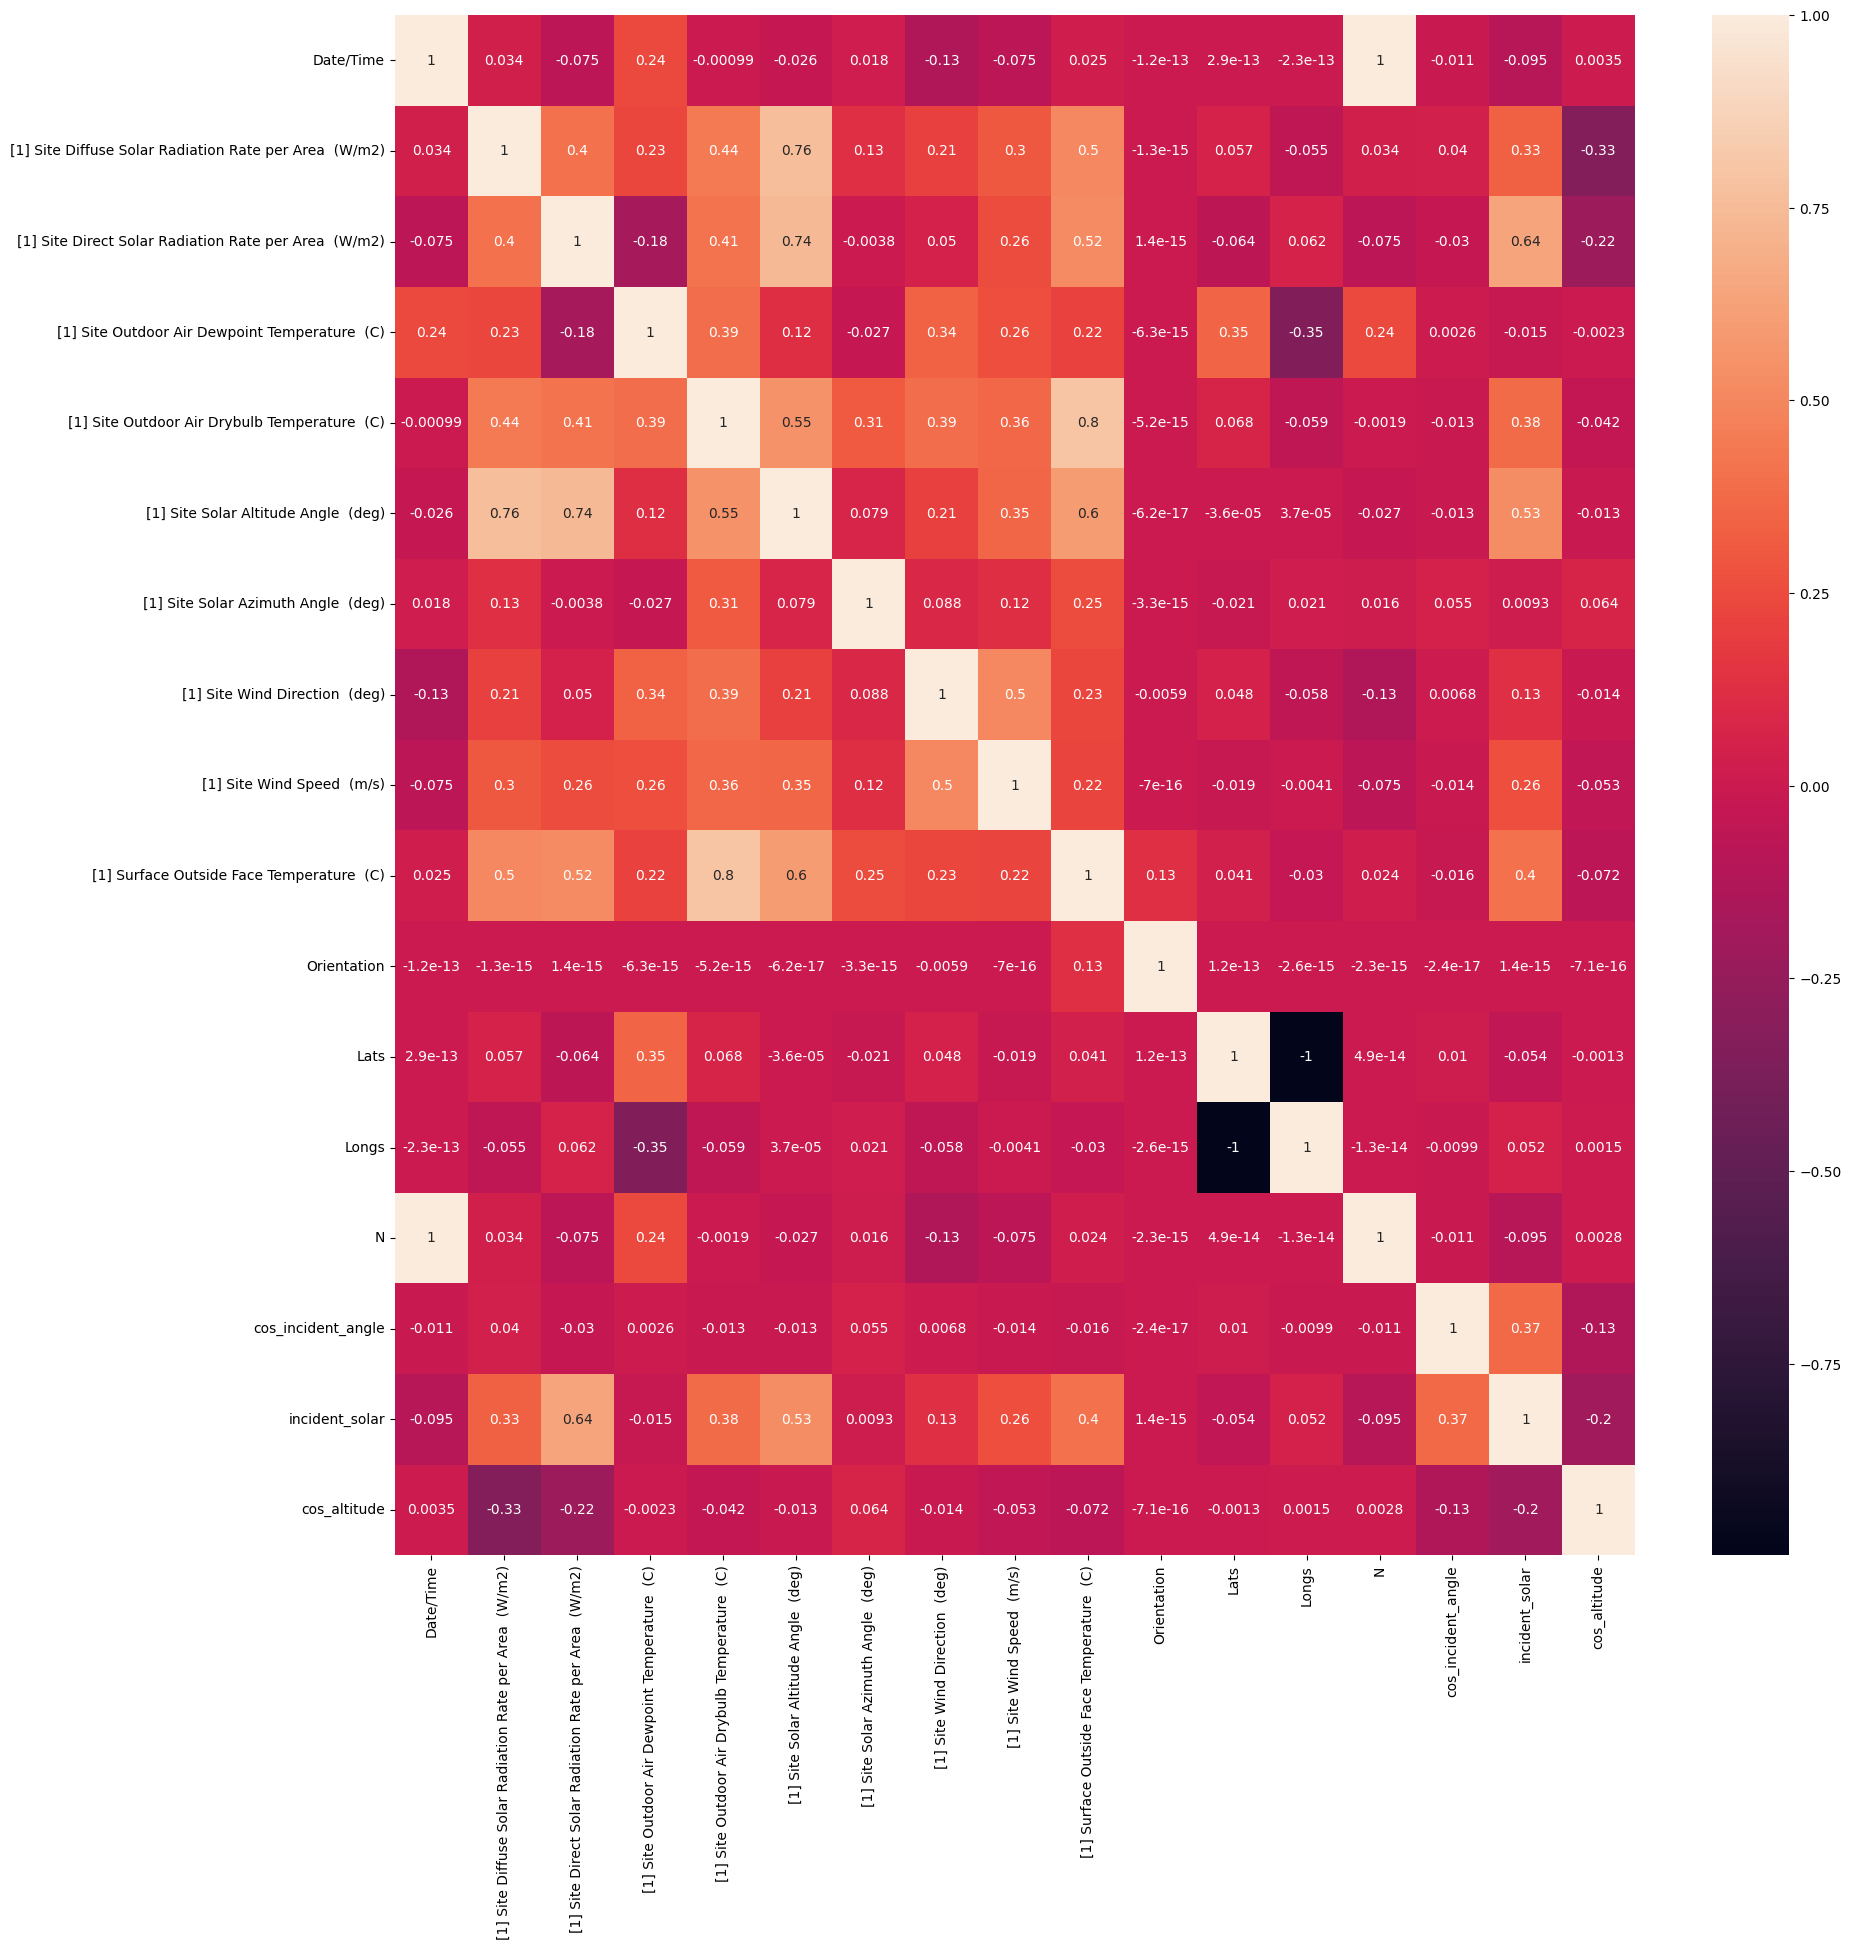

In [20]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(),annot = True)

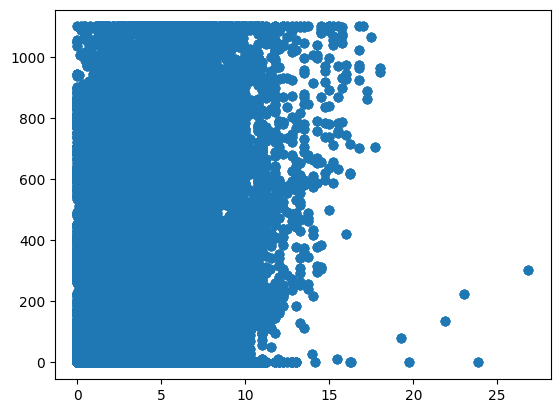

In [21]:
plt.scatter(data['[1] Site Wind Speed  (m/s)'],data['[1] Site Direct Solar Radiation Rate per Area  (W/m2)'])

In [22]:
data['Wind Velocity_square']=data['[1] Site Wind Speed  (m/s)']*data['[1] Site Wind Speed  (m/s)']

In [23]:
data

,Date/Time,[1] Site Diffuse Solar Radiation Rate per Area (W/m2),[1] Site Direct Solar Radiation Rate per Area (W/m2),[1] Site Outdoor Air Dewpoint Temperature (C),[1] Site Outdoor Air Drybulb Temperature (C),[1] Site Solar Altitude Angle (deg),[1] Site Solar Azimuth Angle (deg),[1] Site Wind Direction (deg),[1] Site Wind Speed (m/s),[1] Surface Outside Face Temperature (C),Orientation,Lats,Longs,N,cos_incident_angle,incident_solar,cos_altitude,Wind Velocity_square
0,2002-01-01 01:00:00,0.0,0.0,5.600,14.075,-86.550209,91.104045,220.00,2.925,17.425801,0,23.0225,72.5714,1,0.793500,0.0,0.060174,8.555625
1,2002-01-01 02:00:00,0.0,0.0,6.500,13.550,-75.710457,93.157099,180.00,1.725,17.436224,0,23.0225,72.5714,1,-0.938843,0.0,0.246822,2.975625
2,2002-01-01 03:00:00,0.0,0.0,7.400,13.125,-61.958056,96.159063,45.00,0.350,17.430286,0,23.0225,72.5714,1,0.734600,0.0,0.470118,0.122500
3,2002-01-01 04:00:00,0.0,0.0,7.825,12.400,-48.286846,99.382686,0.00,0.375,17.410444,0,23.0225,72.5714,1,-0.461887,0.0,0.665402,0.140625
4,2002-01-01 05:00:00,0.0,0.0,7.975,11.600,-34.749348,102.923038,0.00,0.875,17.374948,0,23.0225,72.5714,1,-0.160967,0.0,0.821653,0.765625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,2002-12-31 19:00:00,0.0,0.0,6.325,21.350,-12.176278,249.653350,3.75,0.025,23.663594,90,22.7196,75.8577,365,0.162933,0.0,0.977503,0.000625
8755,2002-12-31 20:00:00,0.0,0.0,6.550,18.375,-25.321975,254.015331,0.00,0.000,22.149918,90,22.7196,75.8577,365,-0.792884,0.0,0.903919,0.000000
8756,2002-12-31 21:00:00,0.0,0.0,7.050,16.025,-38.737982,257.722237,30.75,0.000,20.445485,90,22.7196,75.8577,365,0.817814,0.0,0.780016,0.000000
8757,2002-12-31 22:00:00,0.0,0.0,7.575,14.450,-52.333160,260.924964,87.50,0.525,19.256711,90,22.7196,75.8577,365,-0.888687,0.0,0.611069,0.275625


In [42]:
from sklearn.impute import SimpleImputer
import numpy as np

# Define a function to compute the circular mean
def circular_mean(values):
    cos_sum = np.sum(np.cos(np.radians(values)))
    sin_sum = np.sum(np.sin(np.radians(values)))
    circular_mean = np.degrees(np.arctan2(sin_sum, cos_sum))
    return circular_mean if circular_mean >= 0 else 360 + circular_mean

# Assuming 'data' is your DataFrame

# Instantiate SimpleImputer to fill missing values with NaN
imputer = SimpleImputer(strategy='constant', fill_value=np.nan)

# Fill missing values in the 'Wind Direction' column with NaN
data['[1] Site Wind Direction  (deg)'] = imputer.fit_transform(data[['[1] Site Wind Direction  (deg)']])

# Compute circular mean of non-missing values
circular_mean_wind_direction = circular_mean(data['[1] Site Wind Direction  (deg)'].dropna())

# Fill missing values with circular mean
data['[1] Site Wind Direction  (deg)'].fillna(circular_mean_wind_direction, inplace=True)


In [43]:
X = data.drop(columns=['[1] Surface Outside Face Temperature  (C)', 'Date/Time',])
Y = data['[1] Surface Outside Face Temperature  (C)']
X.columns
X.columns = X.columns.astype(str) 

In [44]:
X.describe()

,[1] Site Diffuse Solar Radiation Rate per Area (W/m2),[1] Site Direct Solar Radiation Rate per Area (W/m2),[1] Site Outdoor Air Dewpoint Temperature (C),[1] Site Outdoor Air Drybulb Temperature (C),[1] Site Solar Altitude Angle (deg),[1] Site Solar Azimuth Angle (deg),[1] Site Wind Direction (deg),[1] Site Wind Speed (m/s),Orientation,Lats,Longs,N,cos_incident_angle,incident_solar,cos_altitude,Wind Velocity_square
count,105108.000000,105108.000000,105108.000000,105108.000000,105108.000000,105108.000000,105108.000000,105108.000000,105108.000000,105108.000000,105108.000000,105108.000000,105108.000000,105108.000000,105108.000000,105108.000000
mean,78.309396,231.019608,16.296727,25.848619,0.227428,174.838904,179.275341,3.751532,135.000000,22.994700,72.698667,183.020779,-0.064637,154.098255,0.734232,22.812018
std,113.574154,330.532462,7.137327,6.171036,43.769597,97.401449,112.528644,2.956029,100.623538,0.214174,2.528997,105.354596,0.600334,313.943816,0.241534,32.950497
min,0.000000,0.000000,-5.900000,-1.500000,-86.550209,4.730277,0.000000,0.000000,0.000000,22.719600,69.666900,1.000000,-0.999865,-284.023812,0.060173,0.000000
25%,0.000000,0.000000,10.025000,22.300000,-37.365723,87.134762,54.000000,1.500000,67.500000,22.719600,69.666900,92.000000,-0.607979,0.000000,0.598113,2.250000
50%,6.750000,0.000000,17.400000,26.350000,0.247593,169.146494,225.500000,3.100000,135.000000,23.022500,72.571400,183.000000,-0.025842,0.000000,0.794690,9.610000
75%,134.000000,426.000000,22.925000,29.950000,37.415117,267.856319,272.250000,5.475000,202.500000,23.242000,75.857700,274.000000,0.463725,186.055724,0.943176,29.975625
max,548.500000,1100.000000,28.900000,43.925000,86.550276,347.296505,358.500000,26.850000,270.000000,23.242000,75.857700,365.000000,0.999995,2038.982994,1.000000,720.922500


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [46]:
reg = LinearRegression().fit(X_train, y_train)

In [47]:
reg.score(X_train, y_train)

0.7321350566173312

In [48]:
reg.get_params

<bound method BaseEstimator.get_params of LinearRegression()>

<Axes: >

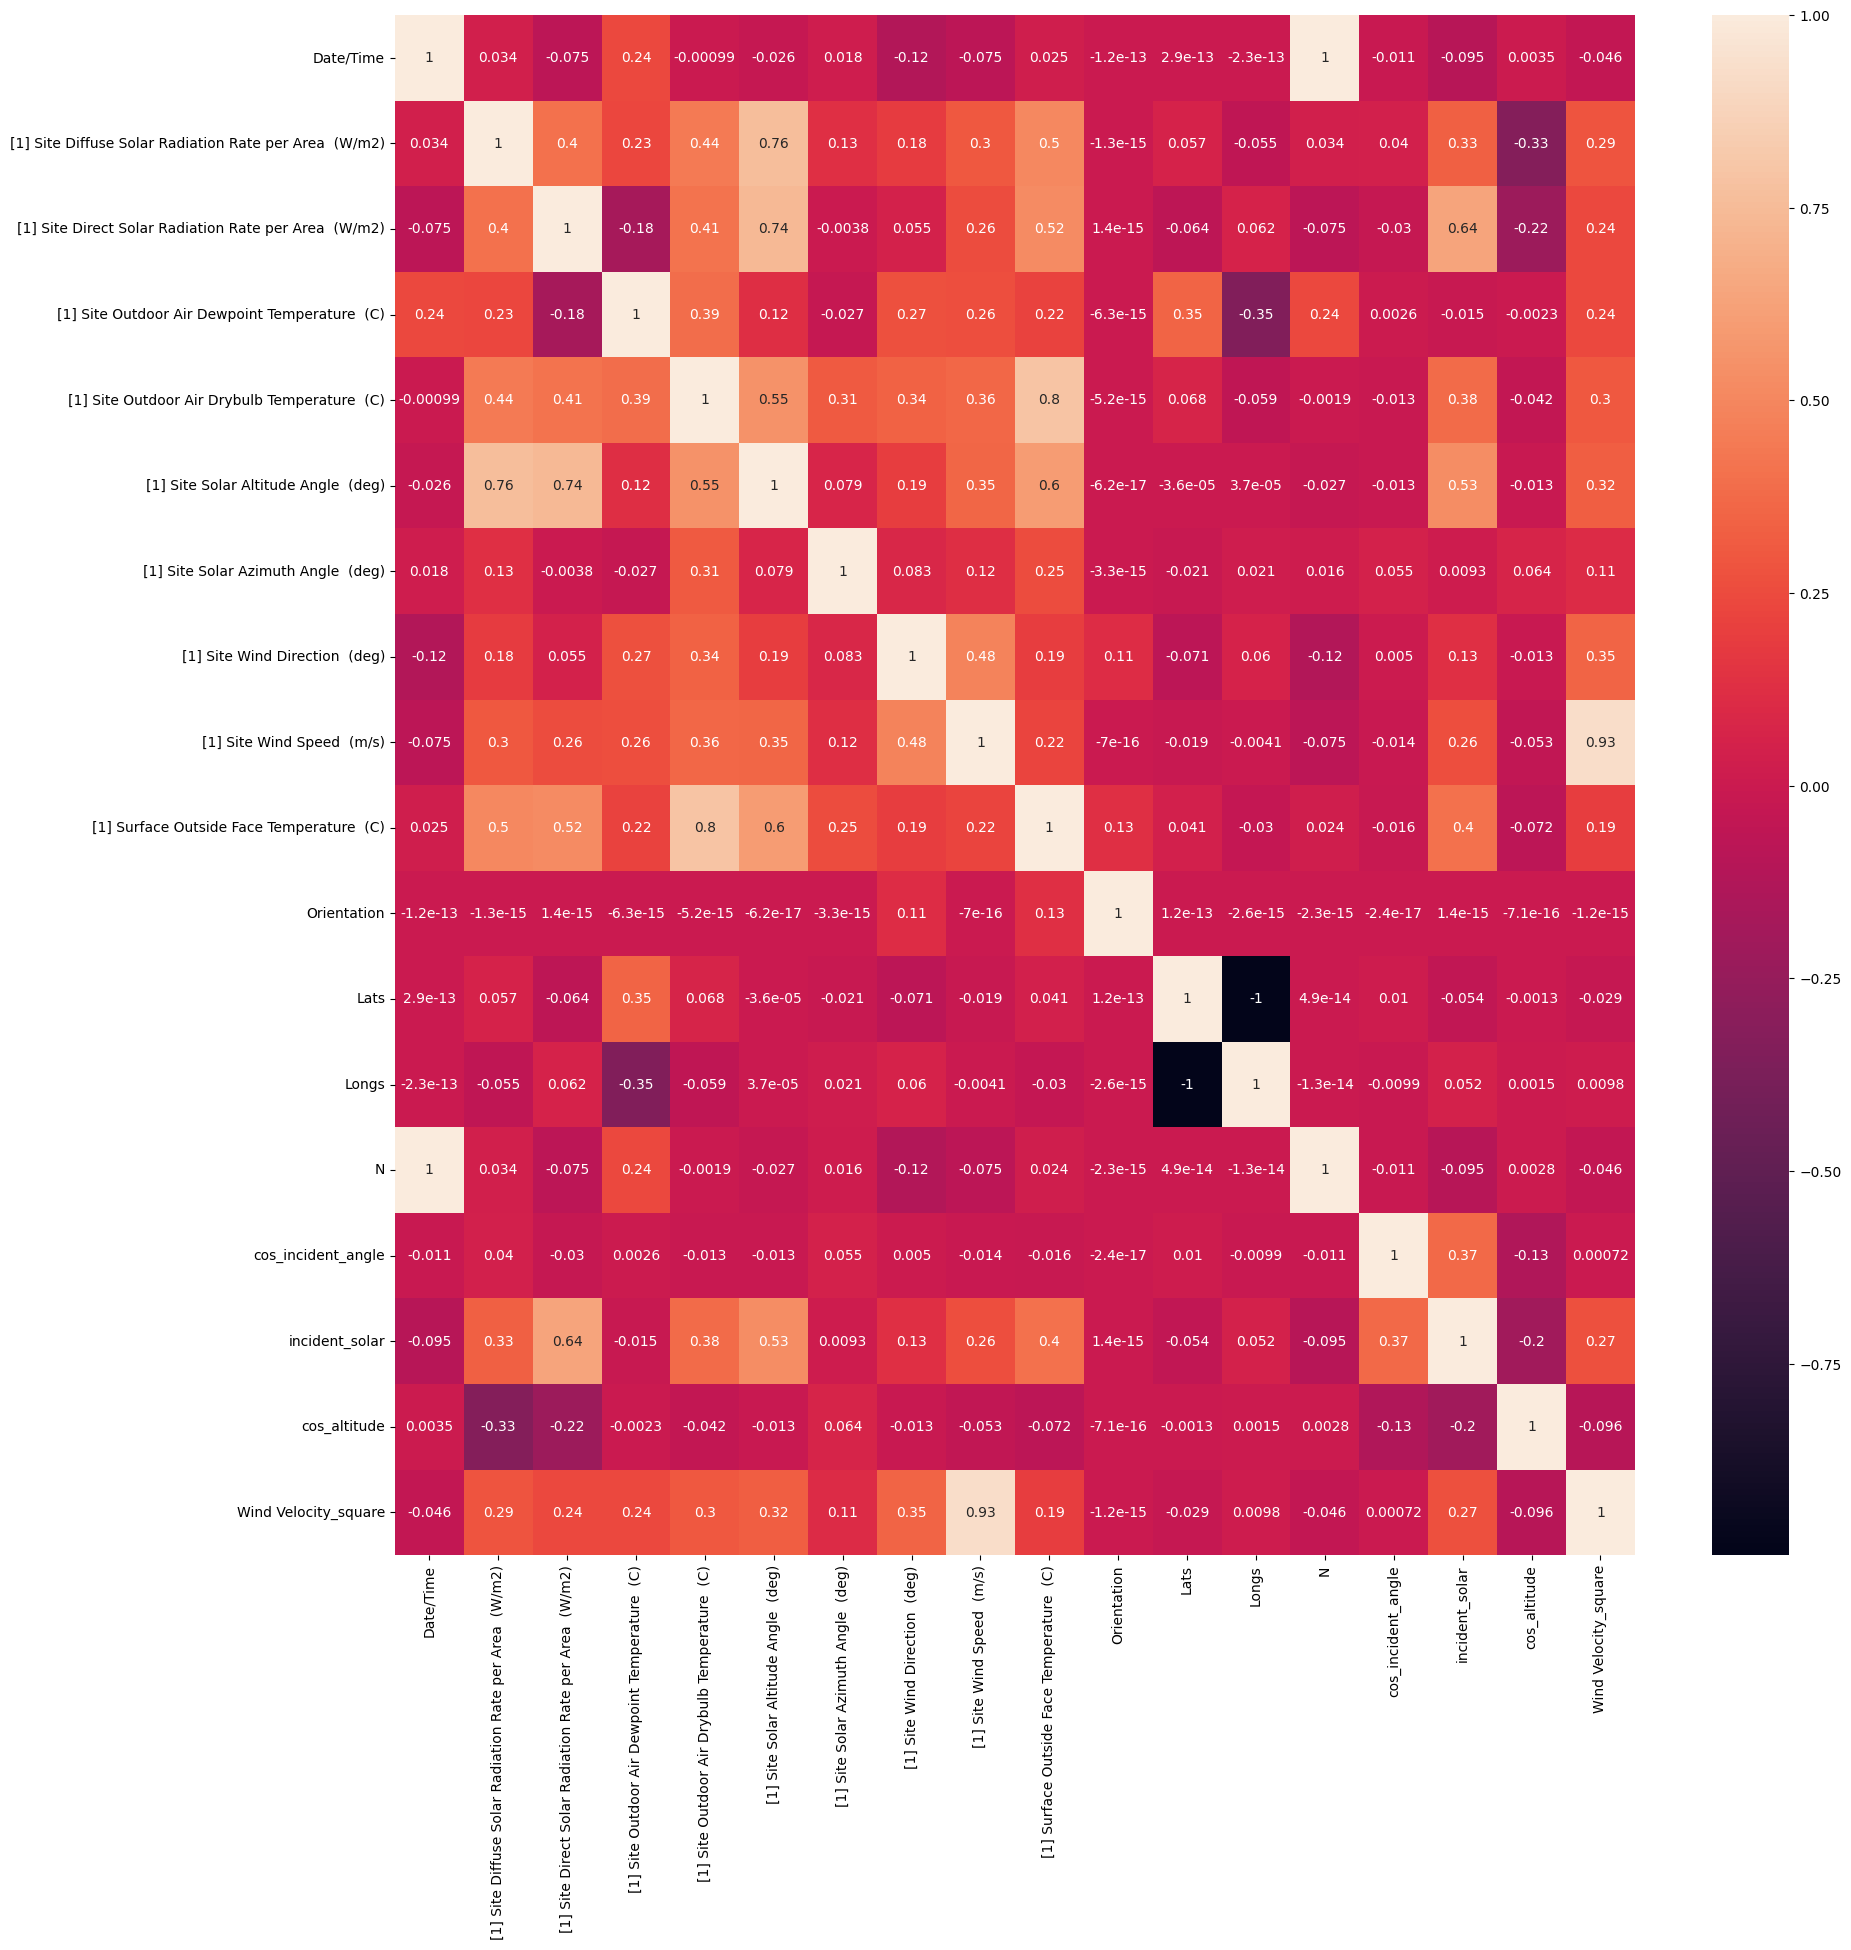

In [49]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(),annot = True)